# Visualize the capacity trajectories for training and test dataset

Stage 1 cycling groups serve as the training set, and Stage 2 cycling groups serve as the test set

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



In [2]:
# Path to the dataset
base_path = Path("Processed_data")

path_save_S1 = base_path/"Stage_1"
path_save_S2 = base_path/"Stage_2"

path_trajectory_S1 = path_save_S1 / "Trajectory_Ah_throughput"
path_trajectory_S2 = path_save_S2 / "Trajectory_Ah_throughput"


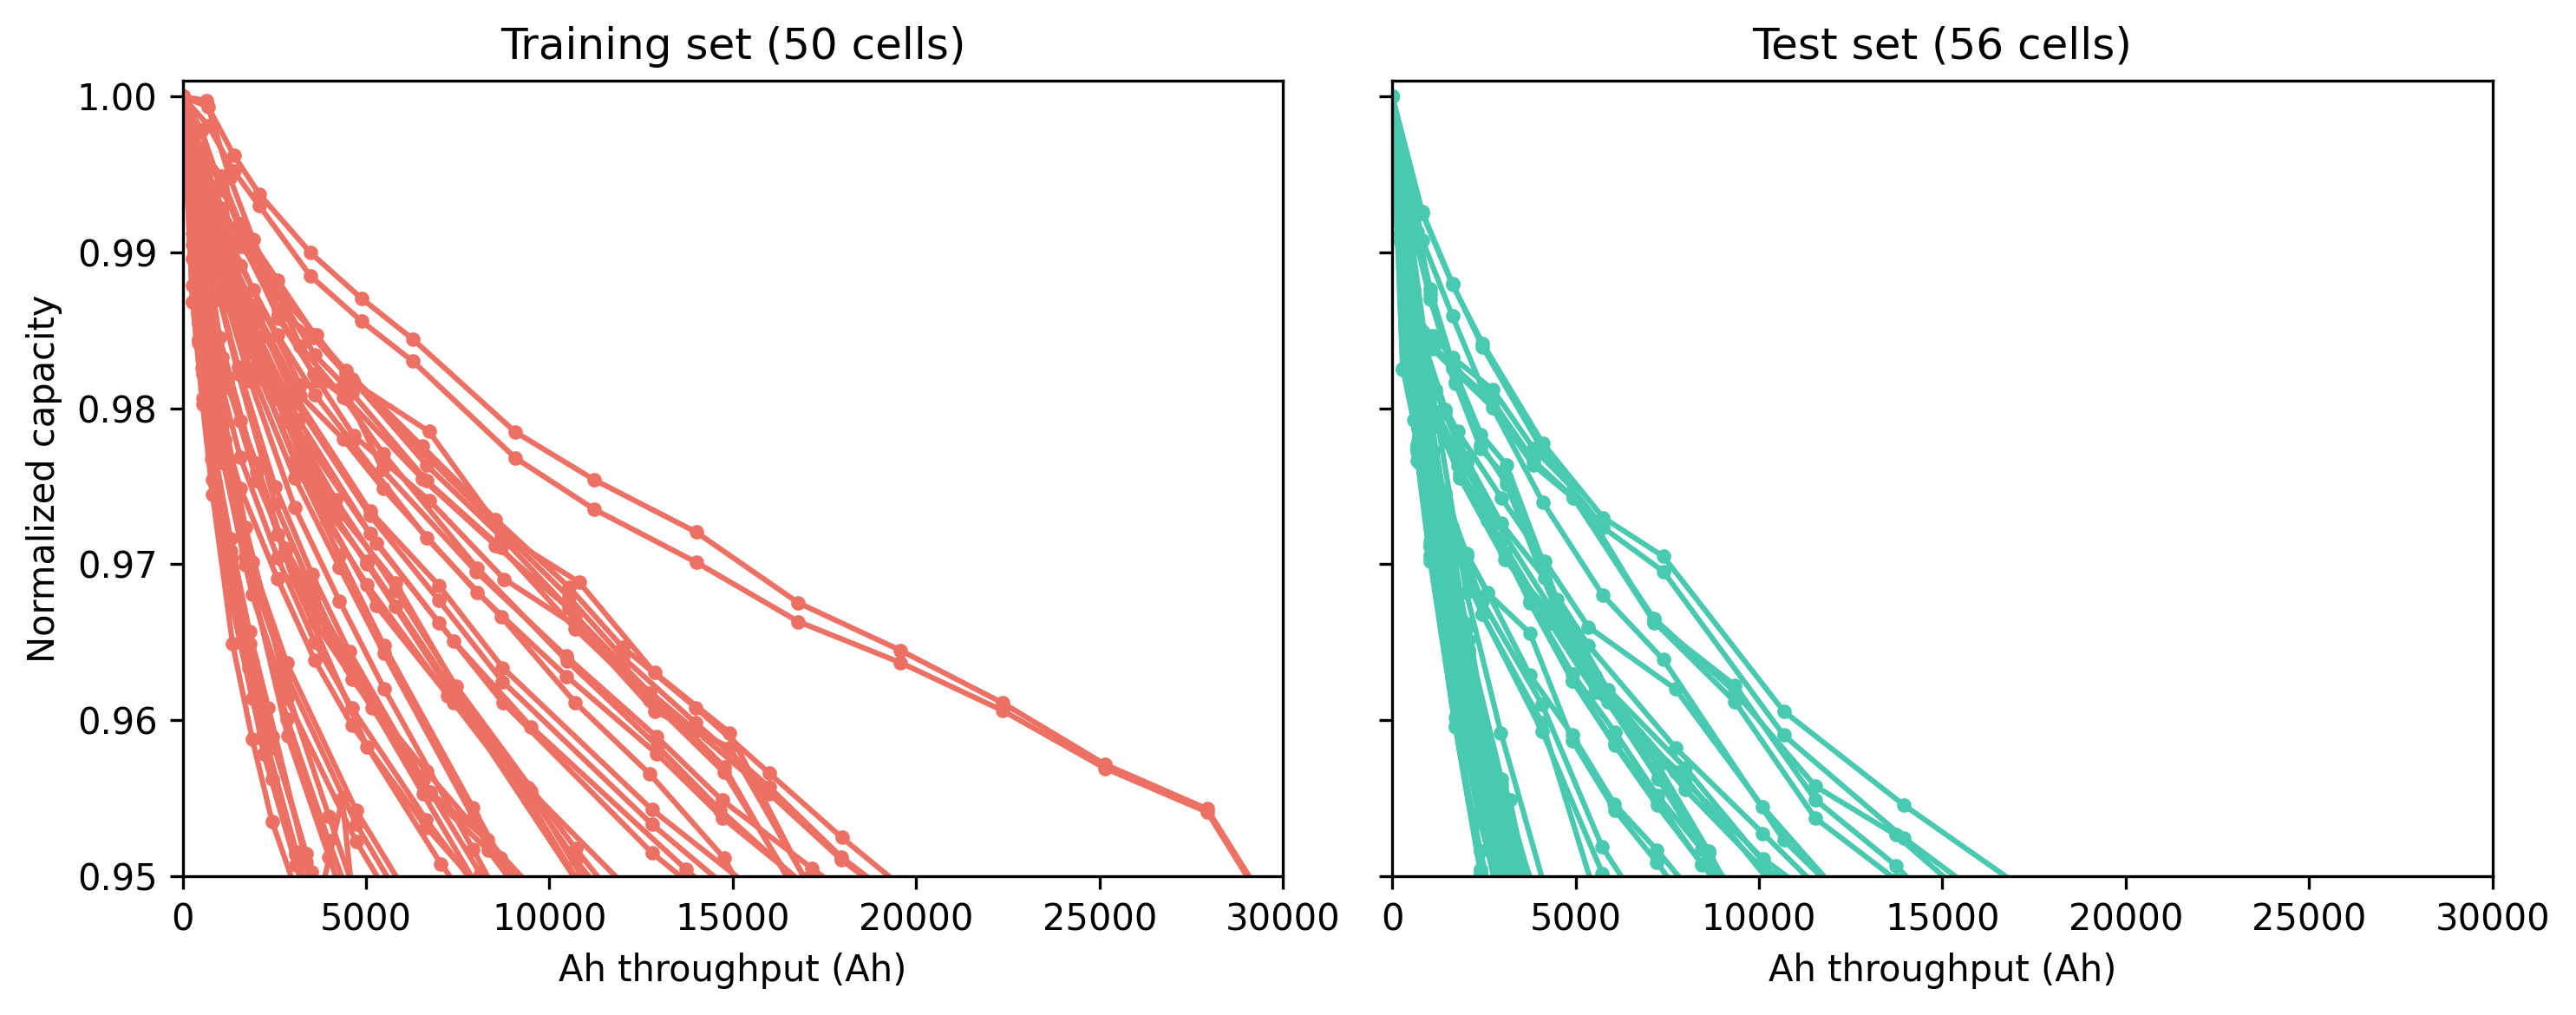

In [4]:
valid_cells_S1 = np.loadtxt(path_save_S1 / "valid_cells_95.txt",dtype=str).flatten().tolist()
valid_cells_S2 = np.loadtxt(path_save_S2 / "valid_cells_95.txt",dtype=str).flatten().tolist()

markersize_ = 3

fig, ax = plt.subplots(1, 2, figsize=(10, 4),dpi=300,sharex=True,sharey=True)
for cell in valid_cells_S1:
    data = pd.read_csv(path_trajectory_S1 / f"{cell}.csv")
    # 0 is Ahthroughput, 1 is capacity, 2 is normalized capacity
    
    ax[0].plot(data['0'],data['2'],'o-',color = '#ec7063',markersize=markersize_)

for cell in valid_cells_S2:
    data = pd.read_csv(path_trajectory_S2 / f"{cell}.csv")
    # 0 is Ahthroughput, 1 is capacity, 2 is normalized capacity
    ax[1].plot(data['0'],data['2'],'o-',color = '#48c9b0',markersize=markersize_)

ax[0].set_xlabel("Ah throughput (Ah)")
ax[0].set_ylabel("Normalized capacity")
ax[0].set_title("Training set (50 cells)")
ax[0].set_ylim(0.95,1.001)
ax[0].set_xlim(0,30000)

ax[1].set_xlabel("Ah throughput (Ah)")
# ax[1].set_ylabel("Normalized capacity")
ax[1].set_title("Test set (56 cells)")

plt.tight_layout()
plt.show()


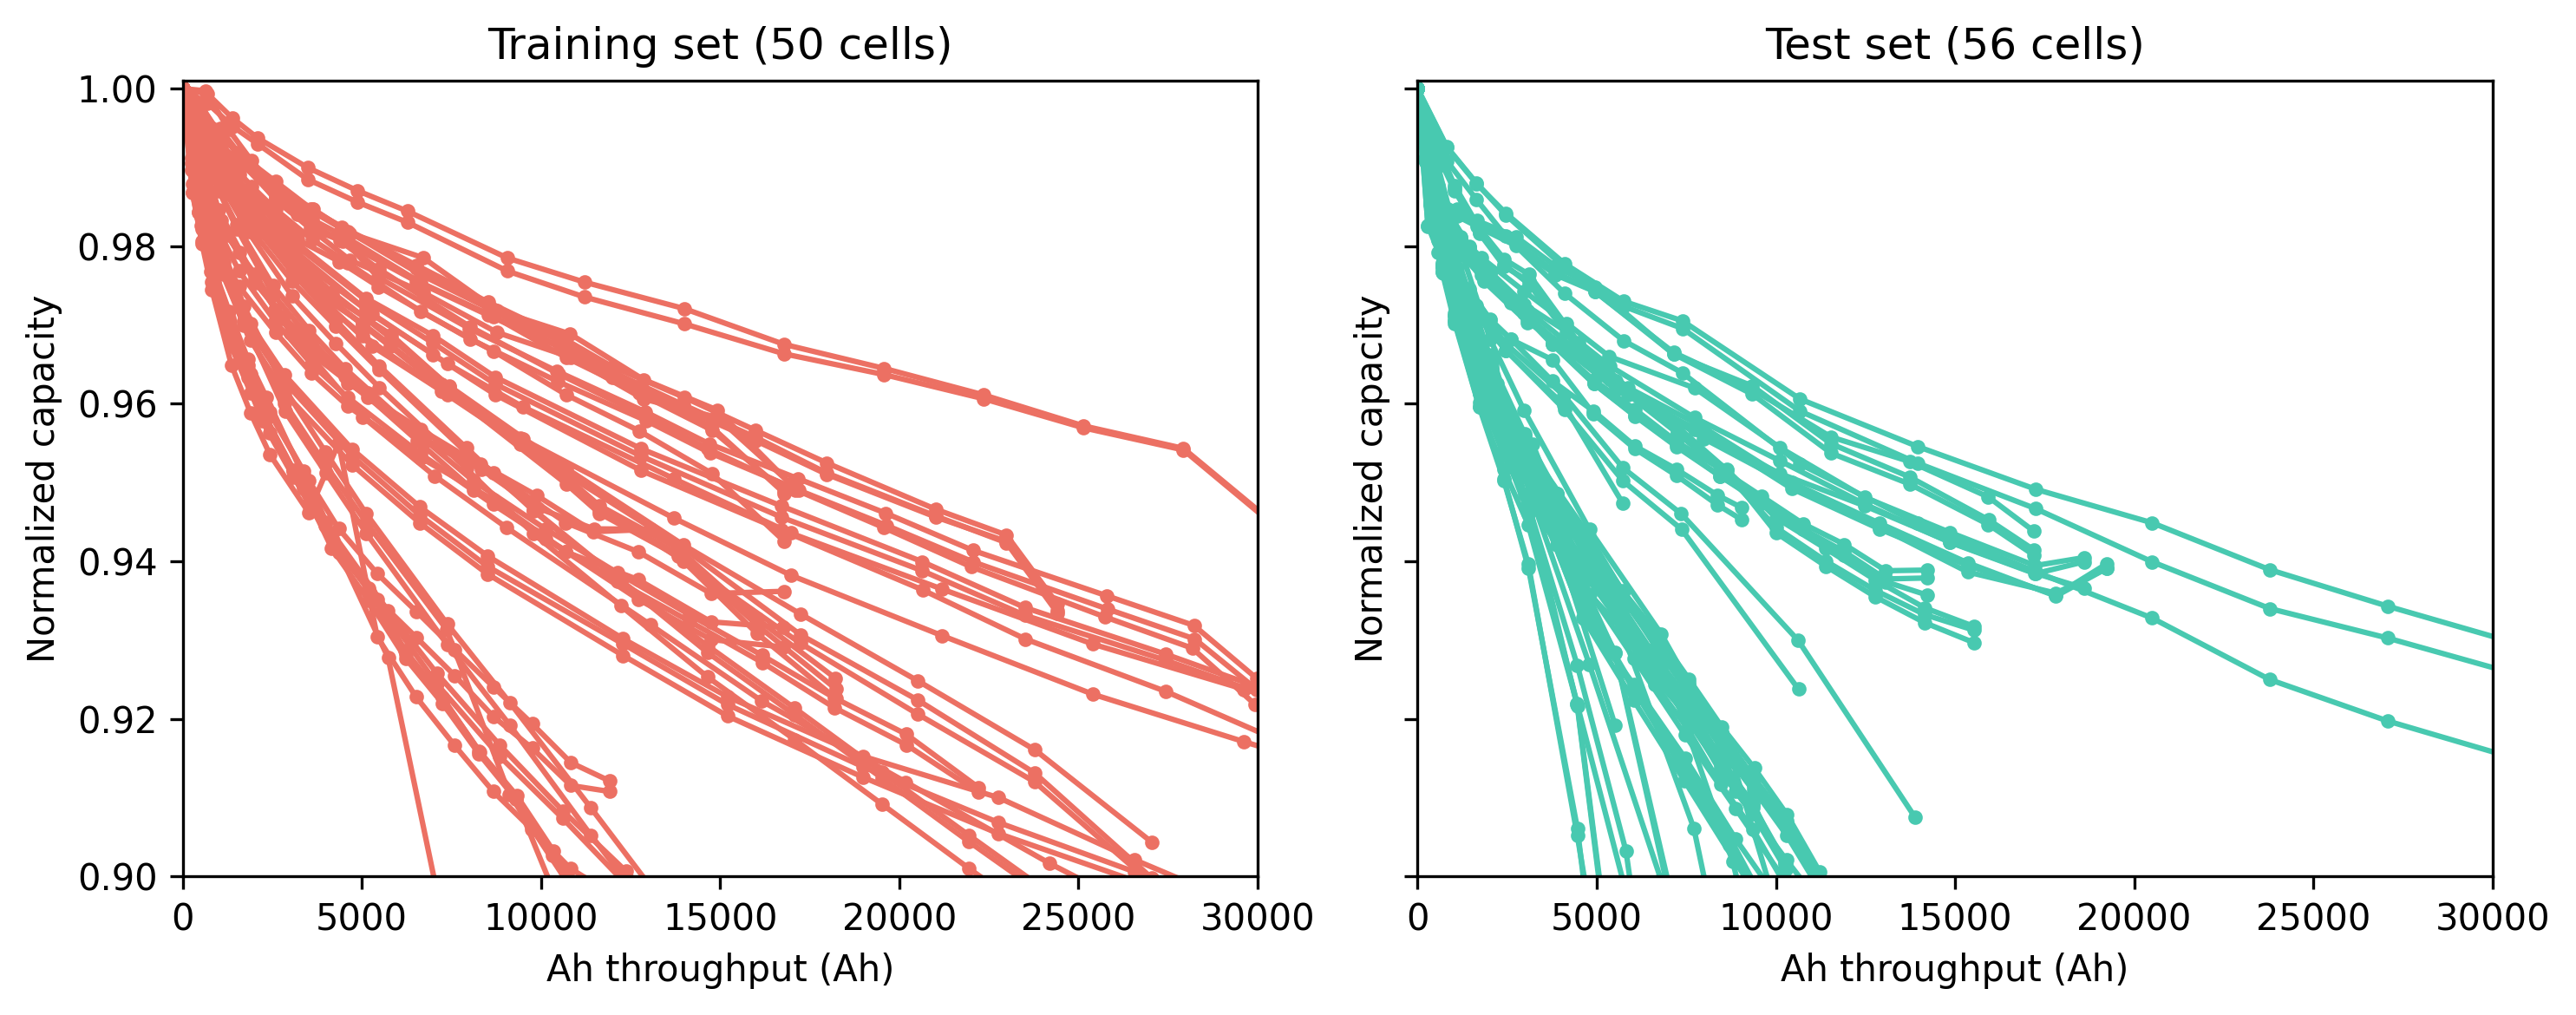

In [38]:
valid_cells_S1 = np.loadtxt(path_save_S1 / "valid_cells_95.txt",dtype=str).flatten().tolist()
valid_cells_S2 = np.loadtxt(path_save_S2 / "valid_cells_95.txt",dtype=str).flatten().tolist()

markersize_ = 3

fig, ax = plt.subplots(1, 2, figsize=(10, 4),dpi=300,sharex=True,sharey=True)
for cell in valid_cells_S1:
    data = pd.read_csv(path_trajectory_S1 / f"{cell}.csv")
    # 0 is Ahthroughput, 1 is capacity, 2 is normalized capacity
    
    ax[0].plot(data['0'],data['2'],'o-',color = '#ec7063',markersize=markersize_)

for cell in valid_cells_S2:
    data = pd.read_csv(path_trajectory_S2 / f"{cell}.csv")
    # 0 is Ahthroughput, 1 is capacity, 2 is normalized capacity
    ax[1].plot(data['0'],data['2'],'o-',color = '#48c9b0',markersize=markersize_)

ax[0].set_xlabel("Ah throughput (Ah)")
ax[0].set_ylabel("Normalized capacity")
ax[0].set_title("Training set (50 cells)")
ax[0].set_ylim(0.9,1.001)
ax[0].set_xlim(0,30000)

ax[1].set_xlabel("Ah throughput (Ah)")
ax[1].set_ylabel("Normalized capacity")
ax[1].set_title("Test set (56 cells)")

plt.tight_layout()
plt.show()


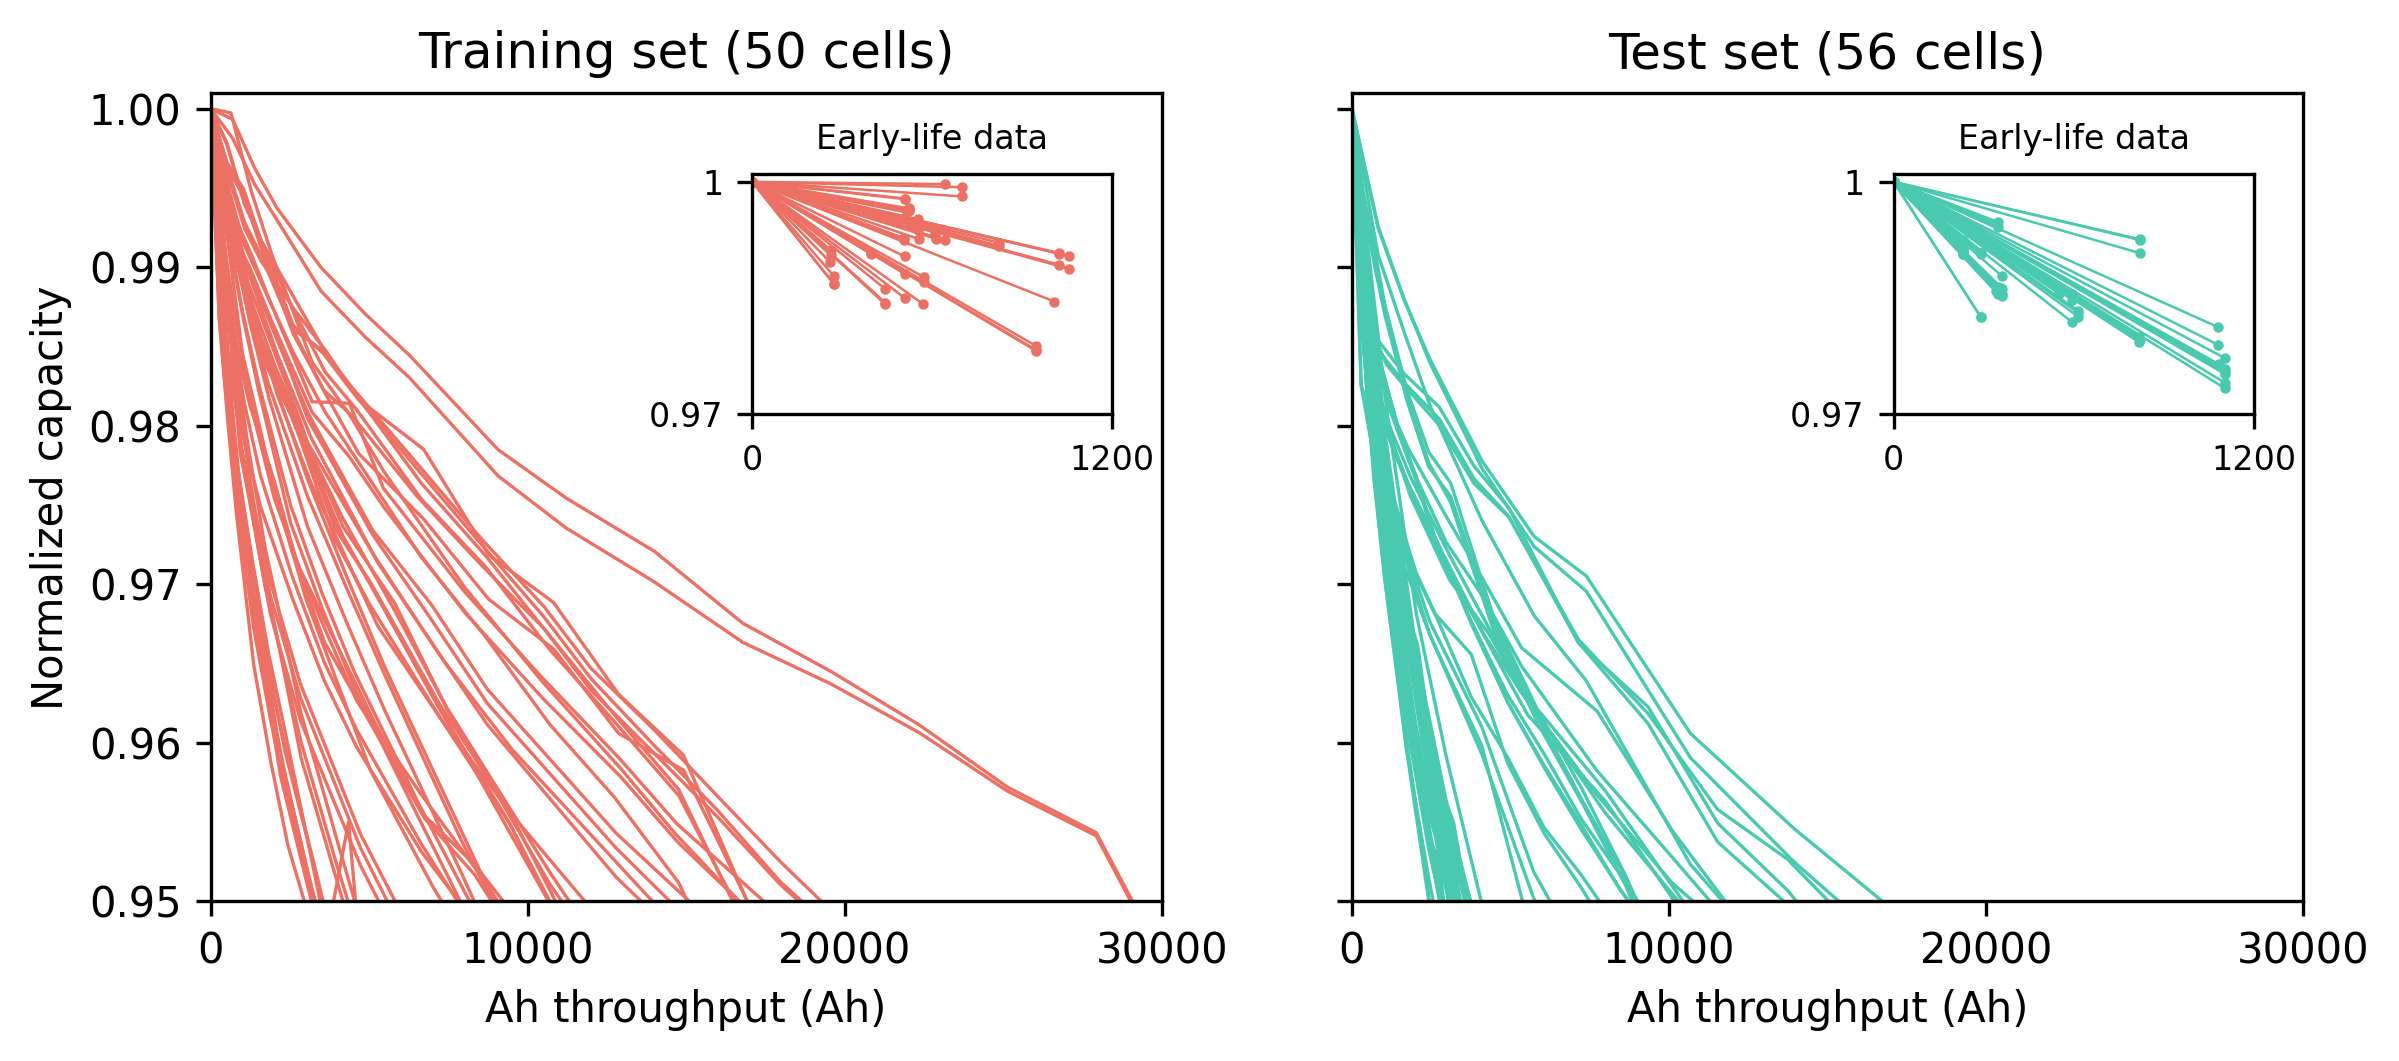

In [46]:
markersize_ = 1.5
linewidth_ = 0.8
fig, ax = plt.subplots(1, 2, figsize=(9, 3.5),dpi=300,sharex=True,sharey=True)
inset_ax_1 = inset_axes(ax[0], width=1.2, height=0.8, loc='upper right',bbox_to_anchor=(.97, 0.925), bbox_transform=ax[0].transAxes)

for cell in valid_cells_S1:
    data = pd.read_csv(path_trajectory_S1 / f"{cell}.csv")
    # 0 is Ahthroughput, 1 is capacity, 2 is normalized capacity
    
    ax[0].plot(data['0'],data['2'],'-',color = '#ec7063',linewidth=linewidth_)
    inset_ax_1.plot(data['0'][:2],data['2'][:2],'o-',color = '#ec7063',markersize=markersize_,linewidth=linewidth_-0.2)
    

inset_ax_2 = inset_axes(ax[1], width=1.2, height=0.8, loc='upper right',bbox_to_anchor=(.97, 0.925), bbox_transform=ax[1].transAxes)

for cell in valid_cells_S2:
    data = pd.read_csv(path_trajectory_S2 / f"{cell}.csv")
    # 0 is Ahthroughput, 1 is capacity, 2 is normalized capacity
    ax[1].plot(data['0'],data['2'],'-',color = '#48c9b0',linewidth=linewidth_)
    inset_ax_2.plot(data['0'][:2],data['2'][:2],'o-',color = '#48c9b0',markersize=markersize_,linewidth=linewidth_-0.2)

ax[0].set_xlabel("Ah throughput (Ah)")
ax[0].set_ylabel("Normalized capacity")
ax[0].set_title("Training set (50 cells)")
ax[0].set_ylim(0.95,1.001)
ax[0].set_xlim(0,30000)
ax[0].set_xticks([0,10000,20000,30000])

ax[1].set_xlabel("Ah throughput (Ah)")
# ax[1].set_ylabel("Normalized capacity")
ax[1].set_title("Test set (56 cells)")

inset_ax_1.set_xlim(0,1200)
inset_ax_1.set_ylim(0.97,1.001)
inset_ax_1.set_xticks([0,1200])
inset_ax_1.set_yticks([0.97,1])
inset_ax_1.set_xticklabels([0,1200],fontsize=8)
inset_ax_1.set_yticklabels([0.97,1],fontsize=8)
inset_ax_1.set_title("Early-life data",fontsize=8)

inset_ax_2.set_xlim(0,1200)
inset_ax_2.set_ylim(0.97,1.001)
inset_ax_2.set_xticks([0,1200])
inset_ax_2.set_yticks([0.97,1.00])
inset_ax_2.set_xticklabels([0,1200],fontsize=8)
inset_ax_2.set_yticklabels([0.97,1],fontsize=8)

inset_ax_2.set_title("Early-life data",fontsize=8)

# plt.tight_layout()
plt.show()